In [112]:
import os
import numpy as np
import pandas as pd

from scipy.spatial.distance import cdist

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn") # pretty matplotlib plots

import warnings
warnings.filterwarnings('ignore')

In [113]:
def trial_split(df):
    """
    trial_split desctiption
    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame

    Returns
    -------
    b: numpy.ndarray
        
    """
    trial = 0
    a = np.ediff1d(df['label'].values, to_begin=0) == 0
    b = np.empty(shape=(len(a)), dtype=int)
    for index in range(len(a)):
        if not a[index]:
            trial += 1
        b[index] = trial
    return b

In [114]:
def initialize_dataset():
    """
    initialize_dataset desctiption

    Returns
    -------
    data_list: numpy.ndarray
    
    data_list: numpy.ndarray
        
    """
    data_list = []
    label_list = []
    # path to data
    filenames = os.listdir(os.getcwd()+"/data/")

    for filename in filenames:
        subject_id = os.path.basename(filename).strip("sub_.csv")

        df = pd.read_csv(os.getcwd()+"/data/"+filename)
        df["trial"] = trial_split(df)

        grouped = df.groupby(["label","trial"])
        grouped_list = []
        labels = []

        for tuple, group in grouped:
            data = group.drop(columns=["label","trial"]).to_numpy(dtype=np.float32)
            grouped_list.append(data)
            labels.append(tuple[0])

        data_list.append(grouped_list)
        label_list.append(labels)

    return np.array(data_list), np.array(label_list)

In [152]:
data_list, label_list = initialize_dataset()

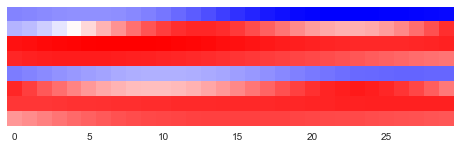

In [171]:
# sample and scale data
sample = data_list[0][3][0:30][:].T
vmax = np.max(sample.flatten())
vmin = np.min(sample.flatten())
sample_std = (sample - vmin) / (vmax - vmin)
sample_scaled = sample_std * (vmax - vmin) + vmin
# display data
plt.imshow(sample_scaled, cmap='bwr', vmax=vmax, vmin=vmin)
plt.grid(False)
plt.yticks([])
plt.show()